<a href="https://colab.research.google.com/github/noviantisafitri/Sistem-Rekomendasi-Tempat-Wisata/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistem Rekomendasi Tempat Wisata**

# **Data Loading**

Tahapan ini digunakan untuk mengunduh dataset dari Kaggle ke Google Colab. File kaggle.json diunggah untuk autentikasi, lalu digunakan untuk mengakses dan mengunduh dataset Indonesia Tourism Destination, yang kemudian diekstrak agar siap digunakan.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noviantisafitri","key":"941226fd0508106c46d775e7ad35a1ba"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d aprabowo/indonesia-tourism-destination

Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 320MB/s]


In [ ]:
!unzip indonesia-tourism-destination.zip

Archive:  indonesia-tourism-destination.zip
  inflating: package_tourism.csv     
  inflating: tourism_rating.csv      
  inflating: tourism_with_id.csv     
  inflating: user.csv                


# **Data Understanding**

In [ ]:
import pandas as pd

df_places = pd.read_csv('tourism_with_id.csv')
df_ratings = pd.read_csv('tourism_rating.csv')

print('Total lokasi unik:', df_places['Place_Id'].nunique())
print('Total penilaian yang tercatat:', df_ratings['Place_Ratings'].shape[0])

Total lokasi unik: 437
Total penilaian yang tercatat: 10000


Tahapan diatas memuat dua dataset dan menampilkan ringkasan awal. Hasilnya menunjukkan terdapat 437 lokasi wisata unik dan 10.000 data penilaian.

## Univariate Exploratory Data Analysis (EDA)

In [ ]:
df_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Output diatas menampilkan informasi struktur dataset df_places yang berisi 437 data lokasi wisata dengan 13 kolom. Diketahui beberapa kolom seperti Time_Minutes memiliki nilai kosong, dan dua kolom (Unnamed: 11 dan Unnamed: 12) tampak tidak relevan karena kosong atau tidak bermakna.

In [ ]:
df_places.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
398,399,Taman Pelangi,Kalau pelangi biasanya ada di siang hari pasca...,Taman Hiburan,Surabaya,0,4.5,20.0,"{'lat': -7.3275604, 'lng': 112.7312242}",-7.327560,112.731224,NaN,399
78,79,Taman Spathodea,Objek Wisata Taman Spathodea di Jagakarsa DKI ...,Taman Hiburan,Jakarta,0,4.6,30.0,"{'lat': -6.3226133, 'lng': 106.8241871}",-6.322613,106.824187,NaN,79
152,153,Pantai Kukup,Pantai Kukup adalah salah satu pantai yang mem...,Bahari,Yogyakarta,10000,4.0,NaN,"{'lat': -8.133876299999999, 'lng': 110.5548349}",-8.133876,110.554835,NaN,153
110,111,Puncak Pinus Becici,Puncak Pinus Becici atau Puncak Becici merupak...,Taman Hiburan,Yogyakarta,3000,4.5,NaN,"{'lat': -7.902035499999998, 'lng': 110.4374627}",-7.902036,110.437463,NaN,111
270,271,Taman Vanda,Taman Vanda Bandung adalah taman yang terletak...,Taman Hiburan,Bandung,0,4.3,45.0,"{'lat': -6.9140478, 'lng': 107.6101684}",-6.914048,107.610168,NaN,271


Sampel data dari df_places menunjukkan informasi berbagai tempat wisata seperti Taman Pelangi, Pantai Kukup, hingga Taman Vanda. Setiap entri mencakup detail seperti nama, deskripsi, kategori (misalnya Taman Hiburan atau Bahari), kota, harga, rating, estimasi waktu kunjungan, serta koordinat lokasi dalam bentuk lat dan long. Terlihat pula bahwa kolom Unnamed: 11 tidak berisi data.

In [ ]:
df_places.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


Hasil statistik deskriptif dari df_places menunjukkan bahwa terdapat 437 tempat wisata dengan rata-rata harga tiket sekitar Rp24.652 dan rating rata-rata 4.44 dari skala 5. Waktu kunjungan yang tercatat pada sebagian data memiliki rata-rata 82 menit. Lokasi tersebar di koordinat lintang antara -8.20 hingga 1.08 dan bujur antara 103.93 hingga 112.82. Kolom Unnamed: 11 sepenuhnya kosong.

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


Data df_ratings terdiri dari 10.000 entri yang mencatat interaksi antara pengguna (User_Id) dan tempat wisata (Place_Id) dalam bentuk penilaian (Place_Ratings). Seluruh kolom terisi lengkap tanpa nilai kosong, dengan tipe data numerik (int64), menandakan dataset ini bersih dan siap digunakan untuk analisis sistem rekomendasi.

In [ ]:
df_ratings.sample(5)

,User_Id,Place_Id,Place_Ratings
2332,72,404,4
7619,229,271,1
4005,123,76,5
2551,78,368,4
3971,122,302,2


Sample data df_ratings menunjukkan beberapa pengguna memberikan penilaian terhadap tempat wisata tertentu. Misalnya, pengguna dengan User_Id 72 memberi rating 4 untuk tempat dengan Place_Id 404. Nilai rating ini berkisar dari 1 hingga 5.

In [ ]:
df_ratings.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Berdasarkan statistik deskriptif dari df_ratings, terdapat 10.000 data penilaian yang diberikan oleh 300 pengguna (User_Id maksimum 300) terhadap 437 tempat wisata. Rata-rata rating yang diberikan adalah sekitar 3.07, dengan rating minimum 1 dan maksimum 5. Mayoritas pengguna memberikan rating antara 2 hingga 4, yang menunjukkan distribusi penilaian cukup merata.

# **Data Preparation**

In [ ]:
df_places.drop(columns=['Description', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'], inplace=True)

Kode tersebut menghapus beberapa kolom spesifik dari DataFrame df_places secara permanen, yaitu kolom 'Description', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', serta dua kolom tak bernama ('Unnamed: 11' dan 'Unnamed: 12').

In [ ]:
print("Missing values pada places:\n", df_places.isna().sum())

Missing values pada places:
 Place_Id      0
Place_Name    0
Category      0
dtype: int64


Kode tersebut mencetak jumlah nilai yang hilang (missing values) pada setiap kolom di DataFrame df_places. Hasilnya menunjukkan bahwa tidak ada data yang hilang di kolom Place_Id, Place_Name, maupun Category.

In [ ]:
print("Missing values pada ratings:\n", df_ratings.isna().sum())

Missing values pada ratings:
 User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


Kode tersebut menampilkan jumlah nilai yang hilang (missing values) pada setiap kolom di DataFrame df_ratings. Hasilnya menunjukkan bahwa kolom User_Id, Place_Id, dan Place_Ratings semuanya tidak memiliki nilai yang hilang.

In [ ]:
print("Data duplikat pada places:", df_places.duplicated().sum())

Data duplikat pada places: 0


Kode tersebut mengecek dan menghitung jumlah baris data duplikat di DataFrame df_places. Hasilnya menunjukkan tidak ada data yang duplikat, alias jumlahnya nol.

In [ ]:
print("Data duplikat pada ratings:", df_ratings.duplicated().sum())

Data duplikat pada ratings: 79


Kode tersebut menghitung jumlah baris data duplikat di DataFrame df_ratings. Hasilnya menunjukkan ada 79 baris yang merupakan data duplikat.

In [ ]:
df_ratings.drop_duplicates(inplace=True)

Kode tersebut menghapus semua baris duplikat secara permanen dari DataFrame df_ratings, sehingga hanya menyisakan data unik saja.

# **Modelling**

## Model Development dengan Content-based

### TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(df_places['Category'])

fitur_kategori = vectorizer.get_feature_names_out()

matrix_tfidf = vectorizer.fit_transform(df_places['Category'])

print("Ukuran matriks TF-IDF:", matrix_tfidf.shape)

Ukuran matriks TF-IDF: (437, 10)


Kode tersebut menggunakan TfidfVectorizer dari scikit-learn untuk mengubah teks kategori di kolom Category menjadi representasi numerik berbasis TF-IDF. Setelah mempelajari data teks kategori, kode menghasilkan matriks TF-IDF dengan ukuran 437 baris (jumlah data) dan 10 kolom (fitur unik kategori).

In [ ]:
dense_tfidf = matrix_tfidf.todense()

pd.DataFrame(
    dense_tfidf,
    columns=fitur_kategori,
    index=df_places['Place_Name']
).sample(10)

,alam,bahari,budaya,cagar,hiburan,ibadah,perbelanjaan,pusat,taman,tempat
Place_Name,,,,,,,,,,
Kebun Tanaman Obat Sari Alam,0.707107,0.0,0.0,0.707107,0.000000,0.0,0.0,0.0,0.000000,0.0
Pulau Pramuka,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Candi Ijo,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
The Great Asia Africa,0.000000,0.0,0.0,0.000000,0.707107,0.0,0.0,0.0,0.707107,0.0
Old City 3D Trick Art Museum,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Pantai Sadranan,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Pulau Semak Daun,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Lawang Sewu,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Danau Rawa Pening,0.707107,0.0,0.0,0.707107,0.000000,0.0,0.0,0.0,0.000000,0.0


Kode tersebut mengubah matriks TF-IDF yang awalnya dalam format sparse menjadi matriks dense (penuh), lalu mengubahnya menjadi DataFrame dengan kolom fitur kategori dan indeks nama tempat (Place_Name). Selanjutnya, kode menampilkan 10 sampel baris acak yang menunjukkan bobot TF-IDF tiap kategori untuk beberapa tempat wisata.

### Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(matrix_tfidf)

df_similarity = pd.DataFrame(
    similarity_matrix,
    index=df_places['Place_Name'],
    columns=df_places['Place_Name']
)

print("Dimensi DataFrame cosine similarity:", df_similarity.shape)

Dimensi DataFrame cosine similarity: (437, 437)


Kode tersebut menghitung kemiripan antar tempat wisata berdasarkan kategori menggunakan cosine similarity dari matriks TF-IDF. Hasilnya berupa matriks persegi 437x437 yang menunjukkan tingkat kesamaan setiap tempat dengan tempat lainnya, lalu disimpan dalam DataFrame dengan indeks dan kolom nama tempat wisata.

In [ ]:
df_similarity.sample(10)

Place_Name,Monumen Nasional,Kota Tua,Dunia Fantasi,Taman Mini Indonesia Indah (TMII),Atlantis Water Adventure,Taman Impian Jaya Ancol,Kebun Binatang Ragunan,Ocean Ecopark,Pelabuhan Marina,Pulau Tidung,...,Monumen Bambu Runcing Surabaya,House of Sampoerna,Atlantis Land Surabaya,Taman Hiburan Rakyat,Taman Mundu,Museum Mpu Tantular,Taman Bungkul,Taman Air Mancur Menari Kenjeran,Taman Flora Bratang Surabaya,Gereja Perawan Maria Tak Berdosa Surabaya
Place_Name,,,,,,,,,,,,,,,,,,,,,
Museum Geologi Bandung,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Pulau Pramuka,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Museum TNI AL Loka Jala Crana,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Hutan Mangrove Kulon Progo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pasar Beringharjo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Watu Mabur Mangunan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Museum Bank Indonesia,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Saung Angklung Mang Udjo,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
The World Landmarks - Merapi Park Yogyakarta,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


Tabel diatas menampilkan 10 baris acak dari DataFrame kemiripan cosine antar tempat wisata, di mana setiap nilai menunjukkan seberapa mirip dua tempat berdasarkan kategori mereka. Nilai 1 berarti kategori sama persis, sedangkan 0 berarti tidak ada kesamaan kategori antara dua tempat tersebut.

### Testing

In [ ]:
def rekomendasi_tempat(nama_tempat, similarity_df=df_similarity, data=df_places[['Place_Name', 'Category']], jumlah=5):
    idx = similarity_df.loc[:, nama_tempat].to_numpy().argpartition(range(-1, -jumlah, -1))
    rekomendasi_terdekat = similarity_df.columns[idx[-1:-(jumlah+2):-1]]
    rekomendasi_terdekat = rekomendasi_terdekat.drop(nama_tempat, errors='ignore')
    return pd.DataFrame(rekomendasi_terdekat).merge(data).head(jumlah)

target_tempat = 'Monumen Nasional'
df_places[df_places['Place_Name'] == target_tempat]

rekomendasi_tempat(target_tempat)

,Place_Name,Category
0,Candi Sewu,Budaya
1,Museum Benteng Vredeburg Yogyakarta,Budaya
2,Museum Satria Mandala,Budaya
3,Kyotoku Floating Market,Budaya
4,Bandros City Tour,Budaya


Fungsi rekomendasi_tempat memberikan rekomendasi tempat wisata serupa berdasarkan kemiripan kategori dengan tempat yang dipilih (nama_tempat). Fungsi ini mencari sejumlah tempat dengan skor kemiripan tertinggi dari matriks cosine similarity, lalu mengembalikan daftar nama tempat beserta kategorinya. Contohnya, untuk target "Monumen Nasional," fungsi merekomendasikan lima tempat wisata lain yang juga bertema budaya dan memiliki kategori serupa.

## Model Development dengan Collaborative Filtering

### Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

unique_user_ids = df_ratings['User_Id'].unique().tolist()

user_mapping = {user_id: idx for idx, user_id in enumerate(unique_user_ids)}
reverse_user_mapping = {idx: user_id for user_id, idx in user_mapping.items()}

unique_place_ids = df_ratings['Place_Id'].unique().tolist()
place_mapping = {place_id: idx for idx, place_id in enumerate(unique_place_ids)}
reverse_place_mapping = {idx: place_id for place_id, idx in place_mapping.items()}

df_ratings['user'] = df_ratings['User_Id'].map(user_mapping)
df_ratings['place'] = df_ratings['Place_Id'].map(place_mapping)
df_ratings['rating'] = df_ratings['Place_Ratings'].astype(np.float32)

Kode tersebut menyiapkan data df_ratings untuk model pembelajaran mesin dengan melakukan pemetaan ID pengguna dan tempat wisata ke indeks numerik yang berurutan, sehingga lebih mudah digunakan dalam pemodelan. Kolom baru user dan place berisi indeks tersebut, sementara kolom rating diubah tipe datanya menjadi float32 untuk kompatibilitas dengan TensorFlow.

In [ ]:
total_users = len(user_mapping)
total_places = len(place_mapping)

rating_min = df_ratings['rating'].min()
rating_max = df_ratings['rating'].max()

print(f'Jumlah Pengguna: {total_users}')
print(f'Jumlah Tempat: {total_places}')
print(f'Rating Minimum: {rating_min}')
print(f'Rating Maksimum: {rating_max}')

Jumlah Pengguna: 300
Jumlah Tempat: 437
Rating Minimum: 1.0
Rating Maksimum: 5.0


Kode tersebut menghitung dan menampilkan total jumlah pengguna (300), total tempat wisata (437), serta rentang nilai rating dari data, mulai dari minimum 1.0 hingga maksimum 5.0. Informasi ini berguna untuk memahami ukuran dataset dan skala rating sebelum membangun model rekomendasi.

### Split Data Latih & Data Uji

In [ ]:
ratings = df_ratings.sample(frac=1, random_state=42)

fitur = ratings[['user', 'place']].values
target = ratings['rating'].apply(lambda r: (r - rating_min) / (rating_max - rating_min)).values

batas_data_latih = int(0.8 * len(ratings))
x_train, x_val = fitur[:batas_data_latih], fitur[batas_data_latih:]
y_train, y_val = target[:batas_data_latih], target[batas_data_latih:]

print(fitur, target)

[[160 259]
 [ 16  54]
 [132 240]
 ...
 [163  74]
 [ 27  70]
 [220  63]] [0.25 0.25 1.   ... 1.   1.   0.5 ]


Kode tersebut mengacak data rating, kemudian menyiapkan fitur input berupa pasangan indeks pengguna dan tempat (user, place) serta target rating yang sudah dinormalisasi ke rentang 0 hingga 1. Selanjutnya, data dibagi menjadi data latih (80%) dan validasi (20%). Output menunjukkan contoh fitur dan target yang telah disiapkan untuk model.

### Model Development

In [ ]:
class ModelRekomendasi(tf.keras.Model):
    def __init__(self, total_user, total_place, dimensi_embedding, **kwargs):
        super(ModelRekomendasi, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            input_dim=total_user,
            output_dim=dimensi_embedding,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-8)
        )
        self.user_bias = layers.Embedding(total_user, 1)

        self.place_embedding = layers.Embedding(
            input_dim=total_place,
            output_dim=dimensi_embedding,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-8)
        )
        self.place_bias = layers.Embedding(total_place, 1)

    def call(self, input_data):
        user_vec = self.user_embedding(input_data[:, 0])
        user_bias = self.user_bias(input_data[:, 0])
        place_vec = self.place_embedding(input_data[:, 1])
        place_bias = self.place_bias(input_data[:, 1])

        dot_interaksi = tf.tensordot(user_vec, place_vec, axes=2)
        output = dot_interaksi + user_bias + place_bias
        return tf.nn.sigmoid(output)

Kelas ModelRekomendasi adalah model deep learning berbasis TensorFlow yang menggunakan embedding untuk mempelajari representasi vektor pengguna dan tempat wisata. Model ini mengalikan vektor embedding pengguna dan tempat (dot product) dan menambahkan bias masing-masing untuk memprediksi rating yang dinormalisasi. Output akhir diproses dengan fungsi sigmoid agar nilai prediksi berada di rentang 0 sampai 1, cocok untuk data rating yang sudah dinormalisasi.

In [ ]:
model = ModelRekomendasi(total_users, total_places, 64)

model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Kode ini membuat instance ModelRekomendasi dengan dimensi embedding 64, lalu mengompilasi model menggunakan fungsi loss Binary Crossentropy, optimizer Adam dengan learning rate 0.0001, dan metrik evaluasi Root Mean Squared Error (RMSE). Setup ini mempersiapkan model untuk pelatihan prediksi rating yang dinormalisasi.

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True
)

Kode ini membuat callback EarlyStopping untuk menghentikan pelatihan model secara otomatis jika metrik validasi tidak membaik selama 5 epoch berturut-turut (patience=5) dengan perbaikan minimal 0.0001. Selain itu, model akan mengembalikan bobot terbaik yang ditemukan selama pelatihan (restore_best_weights=True), mencegah overfitting dan menghemat waktu pelatihan.

In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=16,
    epochs=25,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/25
496/496 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6967 - root_mean_squared_error: 0.3449 - val_loss: 0.6972 - val_root_mean_squared_error: 0.3522
Epoch 2/25
496/496 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6968 - root_mean_squared_error: 0.3457 - val_loss: 0.6971 - val_root_mean_squared_error: 0.3521
Epoch 3/25
496/496 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6958 - root_mean_squared_error: 0.3458 - val_loss: 0.6969 - val_root_mean_squared_error: 0.3520
Epoch 4/25
496/496 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.6942 - root_mean_squared_error: 0.3472 - val_loss: 0.6968 - val_root_mean_squared_error: 0.3519
Epoch 5/25
496/496 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6935 - root_mean_squared_error: 0.3424 - val_loss: 0.6967 - val_root_mean_squared_error: 0.3518
Epoch 6/25
496/496 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6927 - root_mean_squared_error: 0.3429 - val_loss: 0.6967 - val_root_mean_squared_error: 0.3518
Epoch 7/25
496/496 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step 

Model ModelRekomendasi dilatih selama 24 epoch dengan batch size 16, menggunakan data training dan validasi. Loss fungsi yang dipakai adalah Binary Crossentropy, dan metrik yang dipantau adalah Root Mean Squared Error (RMSE).
Pada awal pelatihan, loss dan RMSE di data training dan validasi relatif tinggi dan hanya mengalami penurunan yang sangat kecil.

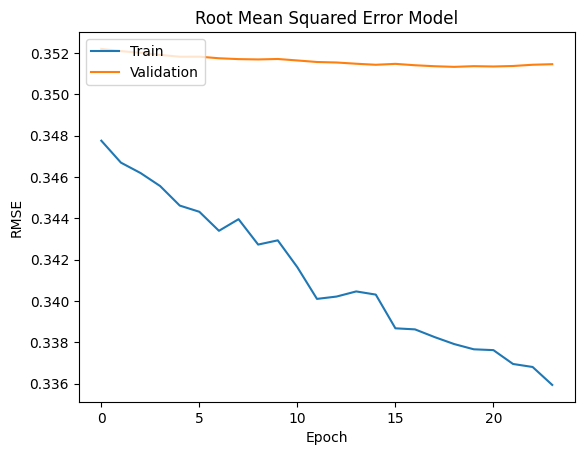

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Root Mean Squared Error Model')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Kode tersebut menampilkan grafik Root Mean Squared Error (RMSE) selama pelatihan model. Grafik menunjukkan bahwa RMSE pada data training terus menurun, sedangkan RMSE pada data validation cenderung stabil. Ini mengindikasikan bahwa model belajar dengan baik pada data pelatihan, namun kurang mengalami peningkatan pada data validasi, yang bisa menjadi tanda awal overfitting.

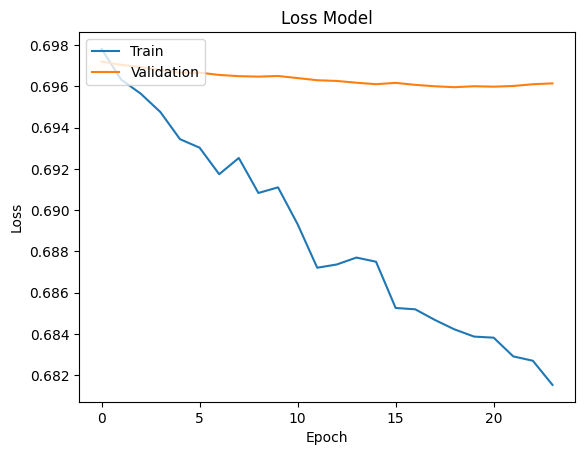

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Kode tersebut memvisualisasikan nilai loss pada data pelatihan dan validasi selama epoch. Grafik menunjukkan bahwa loss pada data pelatihan terus menurun, sedangkan loss validasi relatif datar. Hal ini mengindikasikan model belajar dari data pelatihan, tetapi tidak menunjukkan perbaikan signifikan pada data validasi, yang dapat mengarah pada potensi overfitting.

### Testing

In [ ]:
place_df = df_places
ratings_df = df_ratings

In [ ]:
random_user = ratings_df.User_Id.sample(1).iloc[0]
user_rated = ratings_df[ratings_df.User_Id == random_user]

unrated_places = place_df[~place_df['Place_Id'].isin(user_rated.Place_Id.values)]['Place_Id']
unrated_places = list(set(unrated_places).intersection(place_mapping.keys()))

encoded_unrated = [[place_mapping[x]] for x in unrated_places]
encoded_user = user_mapping.get(random_user)

user_input_array = np.hstack(([[encoded_user]] * len(encoded_unrated), encoded_unrated))

predicted_scores = model.predict(user_input_array).flatten()
top_idx = predicted_scores.argsort()[-10:][::-1]

recommended_ids = [reverse_place_mapping[encoded_unrated[i][0]] for i in top_idx]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Kode tersebut melakukan rekomendasi tempat wisata untuk satu pengguna secara acak dengan cara memilih satu pengguna secara acak dari data rating, lalu diambil daftar tempat yang belum pernah dinilai oleh pengguna tersebut. Selanjutnya, tempat-tempat yang belum dinilai tersebut diubah ke format indeks sesuai pemetaan, dan dibuat array input yang berisi pasangan user dan tempat untuk diprediksi ratingnya oleh model. Setelah itu, model memprediksi skor rating untuk semua tempat yang belum dinilai, dan 10 tempat dengan skor tertinggi dipilih sebagai rekomendasi untuk pengguna tersebut.

In [ ]:
import pandas as pd

print(f"Rekomendasi untuk user: {random_user}")
print("=" * 50)

top_rated = user_rated.sort_values(by='rating', ascending=False).head(5)['Place_Id'].values
top_rated_df = place_df[place_df['Place_Id'].isin(top_rated)][['Place_Name', 'Category']]
top_rated_df.insert(0, 'No', range(1, len(top_rated_df) + 1))
print("Tempat yang pernah diberi rating tinggi:")
display(top_rated_df)

Rekomendasi untuk user: 193
Tempat yang pernah diberi rating tinggi:


,No,Place_Name,Category
141,1,Ledok Sambi,Cagar Alam
172,2,Pantai Nglambor,Bahari
215,3,Farm House Susu Lembang,Taman Hiburan
399,4,Hutan Bambu Keputih,Cagar Alam
427,5,Monumen Bambu Runcing Surabaya,Budaya


Kode tersebut menampilkan rekomendasi untuk pengguna dengan ID 193. Pertama, dicetak informasi tentang user tersebut, lalu ditampilkan 5 tempat yang pernah diberi rating tertinggi oleh user tersebut, lengkap dengan nama tempat dan kategori. Tampilan ini membantu memahami preferensi pengguna sebelum memberikan rekomendasi tempat baru.

In [ ]:
# Tempat rekomendasi
recommended_df = place_df[place_df['Place_Id'].isin(recommended_ids)][['Place_Name', 'Category']]
recommended_df.insert(0, 'No', range(1, len(recommended_df) + 1))
print("\n10 Rekomendasi Tempat Terbaik:")
display(recommended_df)


10 Rekomendasi Tempat Terbaik:


,No,Place_Name,Category
96,1,Monumen Yogya Kembali,Budaya
111,2,Bukit Bintang Yogyakarta,Taman Hiburan
135,3,Grojogan Watu Purbo Bangunrejo,Taman Hiburan
415,4,Keraton Surabaya,Budaya
418,5,Monumen Tugu Pahlawan,Budaya
428,6,House of Sampoerna,Budaya
430,7,Taman Hiburan Rakyat,Taman Hiburan
431,8,Taman Mundu,Taman Hiburan
432,9,Museum Mpu Tantular,Budaya
434,10,Taman Air Mancur Menari Kenjeran,Taman Hiburan


Kode tersebut menampilkan daftar 10 tempat rekomendasi terbaik untuk pengguna tersebut, berupa tabel yang berisi nomor urut, nama tempat, dan kategori tempat. Rekomendasi ini diambil berdasarkan prediksi model terhadap tempat-tempat yang belum pernah dikunjungi atau diberi rating oleh user, sehingga memberikan opsi baru yang sesuai dengan preferensi pengguna.

# **Kesimpulan**

Kesimpulan dari keseluruhan proses dan kode ini adalah pembuatan sistem rekomendasi wisata yang menggabungkan pendekatan collaborative filtering dengan embedding menggunakan model deep learning. Sistem ini memetakan pengguna dan tempat wisata ke dalam ruang vektor berdimensi embedding, lalu memprediksi preferensi pengguna terhadap tempat-tempat yang belum pernah mereka nilai berdasarkan interaksi sebelumnya (rating). Data rating pengguna diolah dan dinormalisasi untuk pelatihan model, yang kemudian digunakan untuk merekomendasikan tempat baru dengan prediksi skor tertinggi. Selain itu, sistem menampilkan riwayat tempat yang disukai pengguna sebagai referensi. Pendekatan ini efektif dalam memberikan rekomendasi personal yang relevan dengan preferensi individu, memanfaatkan pola kolektif dari data pengguna lain, serta menyesuaikan rekomendasi sesuai minat spesifik pengguna.